In [174]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import numpy as np
from matplotlib.ticker import MaxNLocator
import plotly.graph_objects as go


In [64]:
from google.colab import files
files.upload()

Saving US Superstore data.csv to US Superstore data (1).csv


{'US Superstore data (1).csv': b'Row ID;Order ID;Order Date;Ship Date;Ship Mode;Customer ID;Customer Name;Segment;Country;City;State;Postal Code;Region;Product ID;Category;Sub-Category;Product Name;Sales;Quantity;Discount;Profit\r\n1;CA-2016-152156;08.11.2016;11.11.2016;Second Class;CG-12520;Claire Gute;Consumer;United States;Henderson;Kentucky;42420;South;FUR-BO-10001798;Furniture;Bookcases;Bush Somerset Collection Bookcase;261,96;2;0;41,9136\r\n2;CA-2016-152156;08.11.2016;11.11.2016;Second Class;CG-12520;Claire Gute;Consumer;United States;Henderson;Kentucky;42420;South;FUR-CH-10000454;Furniture;Chairs;Hon Deluxe Fabric Upholstered Stacking Chairs, Rounded Back;731,94;3;0;219,582\r\n3;CA-2016-138688;12.06.2016;16.06.2016;Second Class;DV-13045;Darrin Van Huff;Corporate;United States;Los Angeles;California;90036;West;OFF-LA-10000240;Office Supplies;Labels;Self-Adhesive Address Labels for Typewriters by Universal;14,62;2;0;6,8714\r\n4;US-2015-108966;11.10.2015;18.10.2015;Standard Class;S

In [186]:
df = pd.read_csv('/content/US Superstore data.csv', sep=';', encoding='ISO-8859-1')

# **preprocess**

In [247]:
df.head()

,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country,City,State,Region,Product ID,Category,Sub-Category,Sales,Quantity,Discount,Profit
0,2016-11-08,2016-11-11,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,Kentucky,South,FUR-BO-10001798,Furniture,Bookcases,261.9600,2,0.00,41.913600
1,2016-11-08,2016-11-11,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,Kentucky,South,FUR-CH-10000454,Furniture,Chairs,731.9400,3,0.00,219.582000
2,2016-06-12,2016-06-16,Second Class,DV-13045,Darrin Van Huff,Corporate,United States,Los Angeles,California,West,OFF-LA-10000240,Office Supplies,Labels,14.6200,2,0.00,6.871400
3,2015-10-11,2015-10-18,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,Florida,South,FUR-TA-10000577,Furniture,Tables,957.5775,5,0.45,-319.264953
4,2015-10-11,2015-10-18,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,Florida,South,OFF-ST-10000760,Office Supplies,Storage,22.3680,2,0.20,2.516400


In [99]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9994 entries, 0 to 9993
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   Row ID         9994 non-null   int64 
 1   Order ID       9994 non-null   object
 2   Order Date     9994 non-null   object
 3   Ship Date      9994 non-null   object
 4   Ship Mode      9994 non-null   object
 5   Customer ID    9994 non-null   object
 6   Customer Name  9994 non-null   object
 7   Segment        9994 non-null   object
 8   Country        9994 non-null   object
 9   City           9994 non-null   object
 10  State          9994 non-null   object
 11  Postal Code    9994 non-null   int64 
 12  Region         9994 non-null   object
 13  Product ID     9994 non-null   object
 14  Category       9994 non-null   object
 15  Sub-Category   9994 non-null   object
 16  Product Name   9994 non-null   object
 17  Sales          9994 non-null   object
 18  Quantity       9994 non-null

In [187]:
df.duplicated().sum()

0

In [188]:
df.isna().sum()

,0
Row ID,0
Order ID,0
Order Date,0
Ship Date,0
Ship Mode,0
Customer ID,0
Customer Name,0
Segment,0
Country,0
City,0


In [189]:
df['Order Date'] = pd.to_datetime(df['Order Date'], dayfirst=True)  #converting the date
df['Ship Date'] = pd.to_datetime(df['Ship Date'], dayfirst=True)

In [119]:
df.describe()

,Order Date,Ship Date,Sales,Quantity,Discount,Profit
count,9994,9994,9994.000000,9994.000000,9994.000000,9994.000000
mean,2016-04-30 00:07:12.259355648,2016-05-03 23:06:58.571142912,209.365508,3.789574,0.156203,26.307032
min,2014-01-03 00:00:00,2014-01-07 00:00:00,2.286000,1.000000,0.000000,-319.264953
25%,2015-05-23 00:00:00,2015-05-27 00:00:00,17.280000,2.000000,0.000000,1.728750
50%,2016-06-26 00:00:00,2016-06-29 00:00:00,54.490000,3.000000,0.200000,8.666500
75%,2017-05-14 00:00:00,2017-05-18 00:00:00,209.940000,5.000000,0.200000,29.364000
max,2017-12-30 00:00:00,2018-01-05 00:00:00,2481.694600,14.000000,0.800000,580.657882
std,NaN,NaN,394.795901,2.225110,0.206452,97.564856


In [190]:
df['Sales'] = df['Sales'].str.replace(',', '.').astype(float)
df['Profit'] = df['Profit'].str.replace(',', '.').astype(float)
df['Discount'] = df['Discount'].str.replace(',', '.').astype(float)

In [191]:
df['Profit'] = pd.to_numeric(df['Profit'], errors='coerce')

In [192]:
df['Discount'] = pd.to_numeric(df['Discount'], errors='coerce')
df['Sales']= pd.to_numeric(df['Sales'], errors='coerce')

In [193]:
df.drop(['Row ID', 'Order ID','Product Name'], axis=1, inplace=True)

In [194]:
df.drop(['Postal Code'], axis=1, inplace=True)

<module 'matplotlib.pyplot' from '/usr/local/lib/python3.10/dist-packages/matplotlib/pyplot.py'>

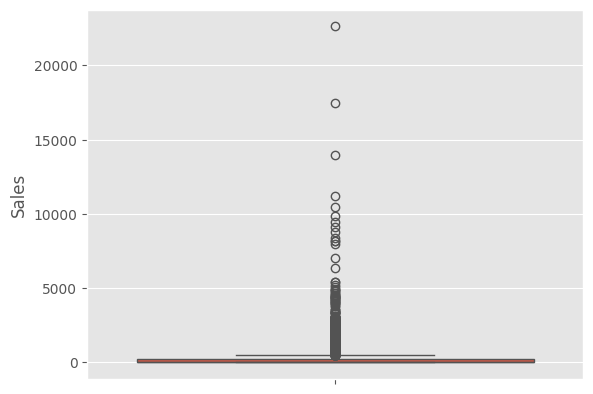

In [195]:
sns.boxplot(df['Sales'])
plt

In [204]:
df['Sales'] = df['Sales'].clip(lower=df['Sales'].quantile(0.01), upper=df['Sales'].quantile(0.99))  #to delete outliers that can affect

<module 'matplotlib.pyplot' from '/usr/local/lib/python3.10/dist-packages/matplotlib/pyplot.py'>

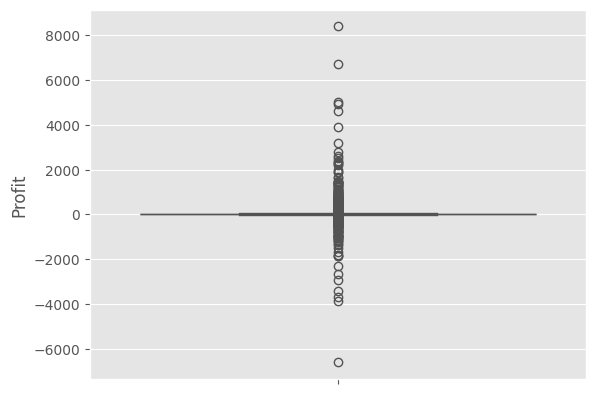

In [196]:
sns.boxplot(df['Profit'])
plt

In [197]:
df['Profit'] = df['Profit'].clip(lower=df['Profit'].quantile(0.01), upper=df['Profit'].quantile(0.99))

<module 'matplotlib.pyplot' from '/usr/local/lib/python3.10/dist-packages/matplotlib/pyplot.py'>

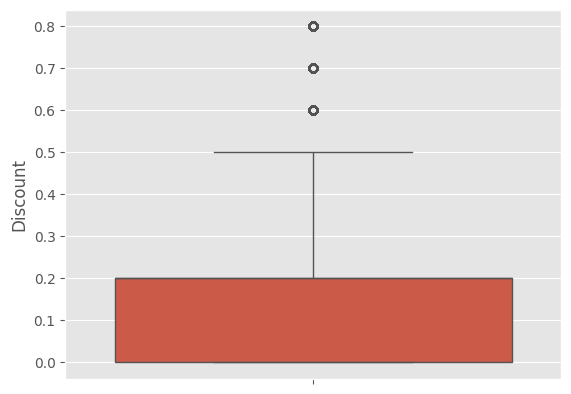

In [198]:
sns.boxplot(df['Discount'])
plt

# Questions

# 1. Which states have the most sales?

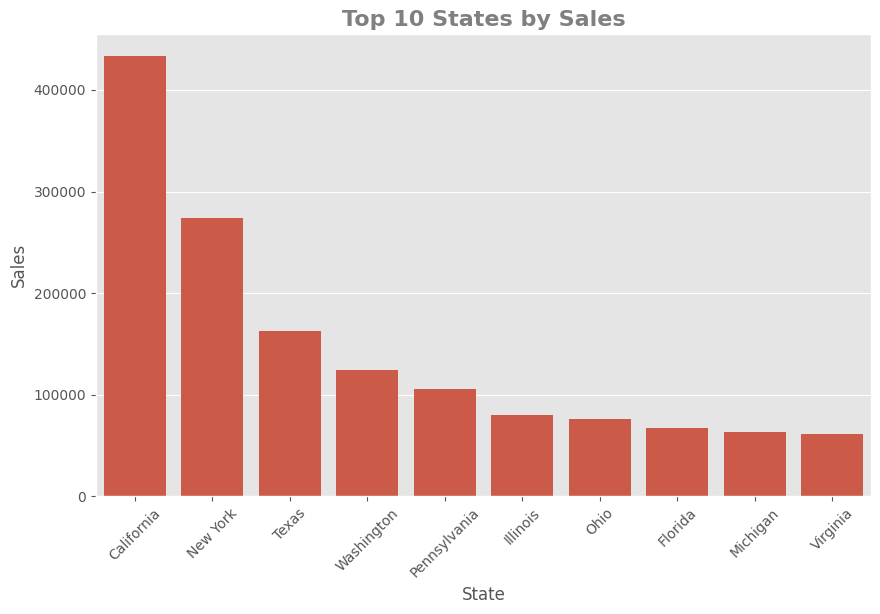

In [205]:
plt.style.use('ggplot')
plt.figure(figsize=(10, 6))
sns.barplot(x=df.groupby('State')['Sales'].sum().sort_values(ascending=False).head(10).index,
            y=df.groupby('State')['Sales'].sum().sort_values(ascending=False).head(10).values)
x_ticks = plt.xticks(rotation=45)
plt.title('Top 10 States by Sales', fontsize=16, fontweight='bold', color='grey')
plt.xlabel('State')
plt.ylabel('Sales')
plt.show()

***Here is the chart showing the top 10 states leading in sales. As we can see, California has the highest sales, followed by New York and Texas. The other states also contributing significantly to sales are Washington, Pennsylvania, Illinois, Ohio, Florida, Michigan, and Virginia.***

# 2. What is the difference between New York and California in terms of sales and profit? (Compare the total sales and profit between New York and California.)

In [200]:
top_states = ['New York', 'California']   #remain only two needed
df_top_states = df[df['State'].isin(top_states)]

In [201]:

state_sales = df_top_states.groupby('State')['Sales'].sum()
state_profit = df_top_states.groupby('State')['Profit'].sum()
melt_state = pd.melt(pd.concat([state_sales, state_profit], axis=1).reset_index(), id_vars='State', value_vars=['Sales', 'Profit'])

<module 'matplotlib.pyplot' from '/usr/local/lib/python3.10/dist-packages/matplotlib/pyplot.py'>

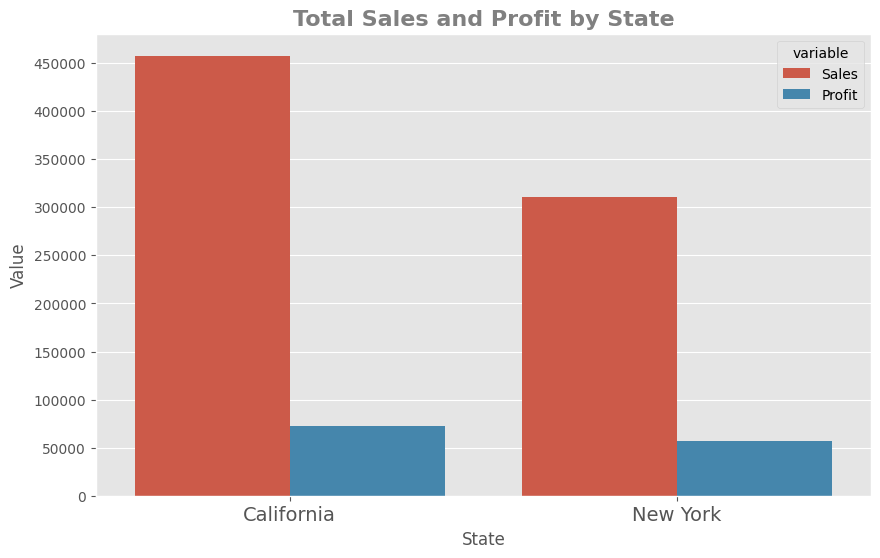

In [206]:
plt.figure(figsize=(10, 6))
sns.barplot(x='State', y='value', hue='variable', data=melt_state)
plt.title('Total Sales and Profit by State', fontsize=16, fontweight='bold', color='grey')
plt.ylabel('Value')
plt.xlabel('State')
plt.xticks(fontsize =14)
plt.gca().yaxis.set_major_locator(MaxNLocator(nbins=10)) #decided to add more ticks

plt

***From the chart, we can see that sales in California exceed those in New York by approximately 150,000, whereas the profit difference is only a few thousand. The reason for this could be the difference in costs. Perhaps rent is more expensive in California, employee salaries are higher, or the process is less optimized. Another possibility could be differences in the taxation system between the states (though I am not sure about this, but it is a hypothesis)***

# 3. Who is an outstanding customer in New York?

Seth Vernon spent about 7000 dallars.

In [179]:
df_new_york = df[df['State'] == 'New York']

In [180]:
rich_customers = df_new_york.groupby('Customer Name')['Sales'].sum().sort_values(ascending=False).head(10)

In [185]:
rich_customers.head(10)

,Sales
Customer Name,
Seth Vernon,6953.4856
Peter Fuller,5931.2186
Greg Tran,5186.5986
Tom Ashbrook,5005.2246
Corinna Mitchell,3999.7900
Darrin Martin,3965.5266
Karen Daniels,3823.0466
Todd Sumrall,3774.0486
Luke Weiss,3744.5886


<ipython-input-209-3e74c2a8d2bb>:2: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.




([0, 1, 2, 3, 4, 5, 6, 7, 8, 9],
 [Text(0, 0, 'Seth Vernon'),
  Text(1, 0, 'Peter Fuller'),
  Text(2, 0, 'Greg Tran'),
  Text(3, 0, 'Tom Ashbrook'),
  Text(4, 0, 'Corinna Mitchell'),
  Text(5, 0, 'Darrin Martin'),
  Text(6, 0, 'Karen Daniels'),
  Text(7, 0, 'Todd Sumrall'),
  Text(8, 0, 'Luke Weiss'),
  Text(9, 0, 'Keith Dawkins')])

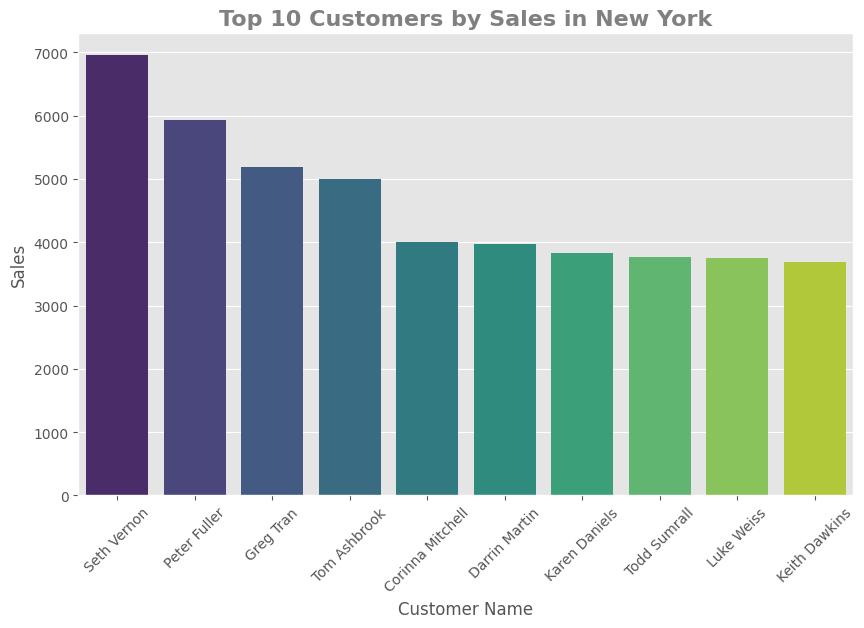

In [209]:
plt.figure(figsize=(10, 6))
sns.barplot(x=rich_customers.index, y=rich_customers.values, palette='viridis', legend = False)
plt.title('Top 10 Customers by Sales in New York', fontsize=16, fontweight='bold', color='grey')
plt.xlabel('Customer Name')
plt.ylabel('Sales')
plt.xticks(rotation=45)

# 4. Are there any differences among states in profitability?

In [216]:

df_sorted = df.sort_values(by='Profit', ascending=False)


<Figure size 1400x800 with 0 Axes>

In [222]:
df_sorted.head()

,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country,City,State,Region,Product ID,Category,Sub-Category,Sales,Quantity,Discount,Profit
353,2016-09-01,2016-09-03,First Class,AB-10060,Adam Bellavance,Home Office,United States,New York City,New York,East,OFF-BI-10004995,Office Supplies,Binders,2481.6946,4,0.2,580.657882
2848,2017-04-08,2017-04-15,Standard Class,DM-13345,Denise Monton,Corporate,United States,Roswell,Georgia,South,OFF-BI-10001359,Office Supplies,Binders,2481.6946,3,0.0,580.657882
8760,2016-01-31,2016-02-06,Standard Class,BF-11170,Ben Ferrer,Home Office,United States,Atlanta,Georgia,South,OFF-BI-10003527,Office Supplies,Binders,1270.9900,1,0.0,580.657882
8749,2015-06-16,2015-06-19,First Class,LC-16885,Lena Creighton,Consumer,United States,New York City,New York,East,OFF-BI-10003527,Office Supplies,Binders,2481.6946,3,0.2,580.657882
8680,2016-12-01,2016-12-03,Second Class,JD-15895,Jonathan Doherty,Corporate,United States,Richmond,Virginia,South,OFF-AP-10002945,Office Supplies,Appliances,2104.5500,7,0.0,580.657882


<ipython-input-221-187bd4647fab>:2: FutureWarning:



The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.


<ipython-input-221-187bd4647fab>:2: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.




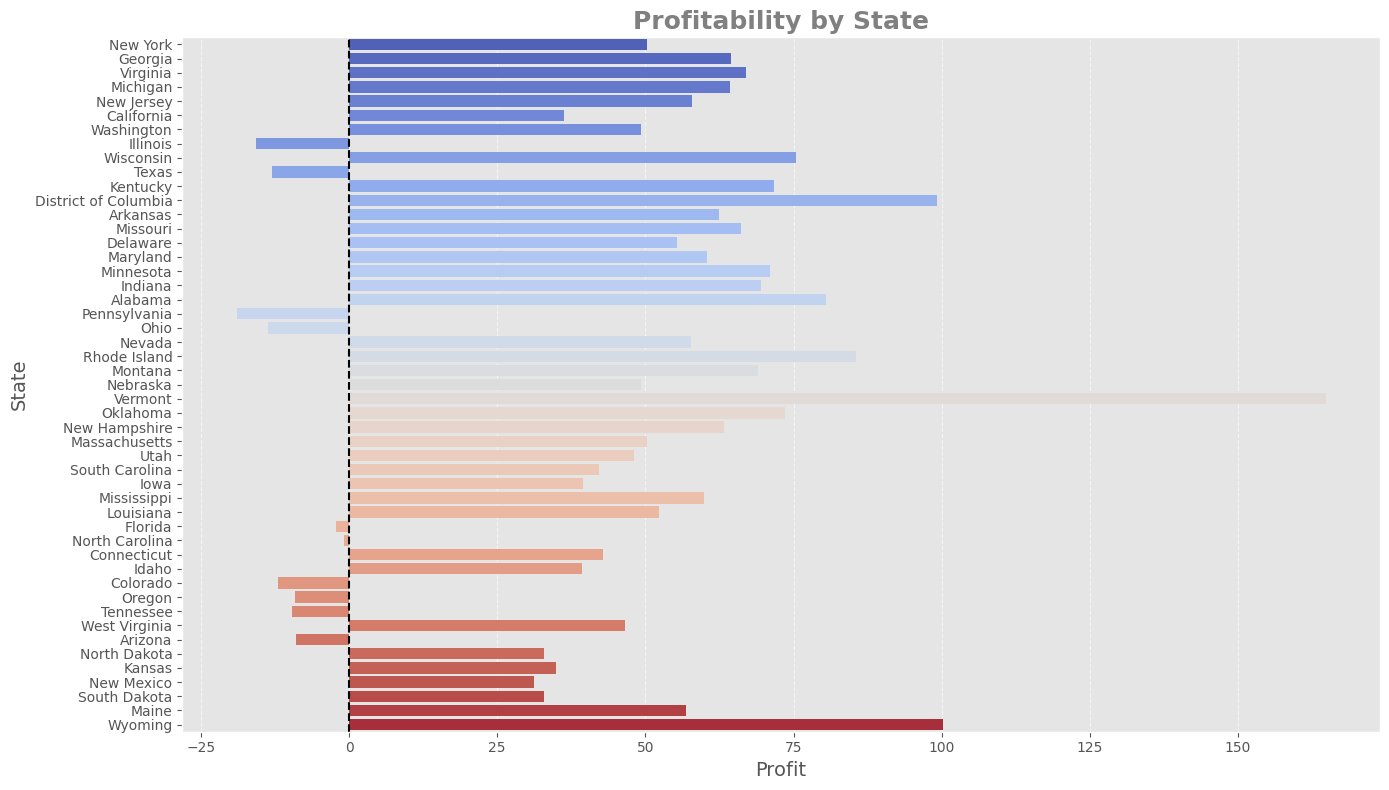

In [221]:
plt.figure(figsize=(14, 8))
sns.barplot(df_sorted, x='Profit', y='State', palette='coolwarm', ci=None) #ci - not to show confidence intervals
plt.title('Profitability by State', fontsize=18, fontweight='bold', color='grey')
plt.xlabel('Profit', fontsize=14)
plt.ylabel('State', fontsize=14)
plt.axvline(0, color='black', linestyle='--', linewidth=1.5) # add 0 line
plt.grid(axis='x', linestyle='--', alpha=0.6)
plt.tight_layout()
plt.show()

#desided to make vertical bar plot (in that situation its more readable)

***There is a significant difference in profitability between the states. Some states have negative profitability. Among the unprofitable states, Pennsylvania stands out as the leader in losses, while Vermont generates the highest profit.***

# 5. The Pareto Principle,
 also known as the 80/20 rule, is a concept derived from the work of Italian economist Vilfredo Pareto. It states that roughly 80% of the effects come from 20% of the causes. For instance, identifying the top 20% of products that generate 80% of sales or the top 20% of customers that contribute to 80% of profit can help in prioritizing efforts and resources. This focus can lead to improved efficiency and effectiveness in business strategies. Can we apply Pareto principle to customers and Profit ? (Determine if 20% of the customers contribute to 80% of the profit.)





In [297]:
prof_customers = df.groupby('Customer Name')['Profit'].sum().sort_values(ascending=False) # need to understand sum of profit

In [298]:
prof_customers_df = prof_customers.to_frame()

In [299]:
prof_customers_df['Profit'] = pd.to_numeric(prof_customers_df['Profit'], errors='coerce')


In [300]:
best_customers = prof_customers.head(int(0.2 * len(prof_customers)))

In [301]:
prof_customers_df['best_customers'] = prof_customers_df.index.isin(best_customers.index)
prof_customers_df['best_customers'] = pd.Series(prof_customers_df['best_customers']).map({True: 'Best Customers', False: 'Other Customers'})
 #add a new fitcha

In [302]:
total_profit_by_group = prof_customers_df.groupby('best_customers')['Profit'].sum() # prepare for a pie chart
labels = total_profit_by_group.index
sizes = total_profit_by_group.values


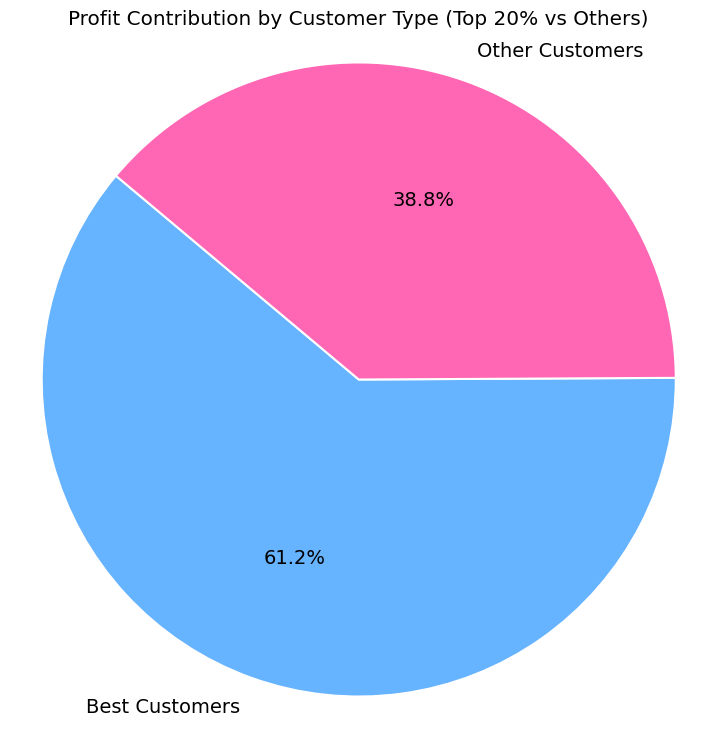

In [303]:
plt.figure(figsize=(9, 9))
plt.pie(sizes, labels=labels, autopct='%1.1f%%', startangle=140,
        colors=['#66b3ff', '#ff66b3'],
        wedgeprops={'edgecolor': 'white', 'linewidth': 1.5},
        textprops={'fontsize': 14})
plt.title('Profit Contribution by Customer Type (Top 20% vs Others)')
plt.axis('equal')
plt.show()

***Analysis: After conducting the analysis, it can be concluded that the Pareto principle is not fully confirmed in this case, as the top 20% of customers contribute 61.2% of the profit. However, it is worth noting that this is still a significant portion.***

# 6. What are the Top 20 cities by Sales ? What about the Top 20 cities by Profit ? Are there any difference among cities in profitability ? (Identify the top 20 cities based on total sales and total profit and analyze differences in profitability among these cities.)

In [280]:
top_cities_sales = df.groupby('City')['Sales'].sum().sort_values(ascending=False).head(20)  #find top 20
top_cities_profit = df.groupby('City')['Profit'].sum().sort_values(ascending=False).head(20)

In [281]:
sales_df = pd.DataFrame({'City': top_cities_sales.index, 'Value': top_cities_sales.values, 'Metric': 'Sales'})  #create a new DF (needed to concat)
profit_df = pd.DataFrame({'City': top_cities_profit.index, 'Value': top_cities_profit.values, 'Metric': 'Profit'})

In [282]:
full_df= pd.concat([sales_df, profit_df])

/usr/local/lib/python3.10/dist-packages/seaborn/axisgrid.py:854: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.


/usr/local/lib/python3.10/dist-packages/seaborn/axisgrid.py:854: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.




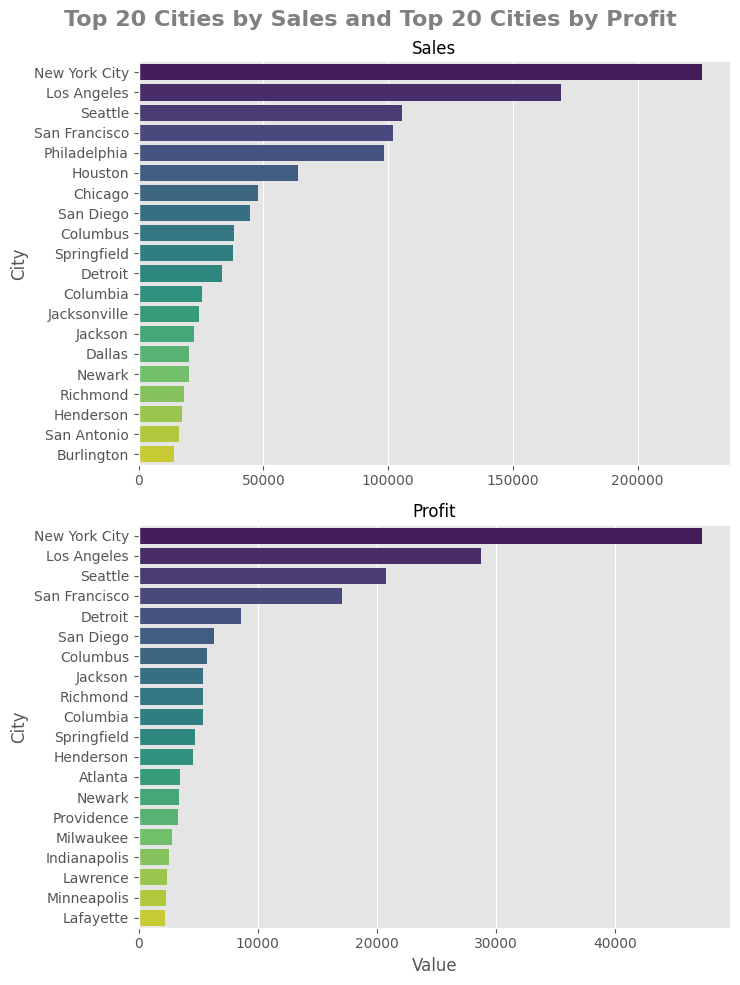

In [283]:
fig = sns.FacetGrid(full_df, col='Metric', sharex=False, sharey=False, col_wrap=1, height=5, aspect=1.5)
fig.map_dataframe(sns.barplot, x="Value", y="City", palette="viridis")
fig.set_axis_labels('Value', 'City')
fig.set_titles(col_template="{col_name}")
plt.subplots_adjust(top=0.85)

fig.fig.suptitle('Top 20 Cities by Sales and Top 20 Cities by Profit', fontsize=16, fontweight='bold', color='grey')
plt.tight_layout()
plt.show()

 ***Several cities, such as New York, Los Angeles, Seattle, and San Francisco, are in the top 20 for both sales and profit, indicating high efficiency in these markets. Houston and Philadelphia are in the top for sales but not for profit, which suggests lower profitability. On the other hand, Detroit and Atlanta are in the top for profit, even though they did not make the list for sales.***

# 7. What are the Top 20 customers by Sales?

<ipython-input-228-ce7c6d8631a3>:2: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.




<module 'matplotlib.pyplot' from '/usr/local/lib/python3.10/dist-packages/matplotlib/pyplot.py'>

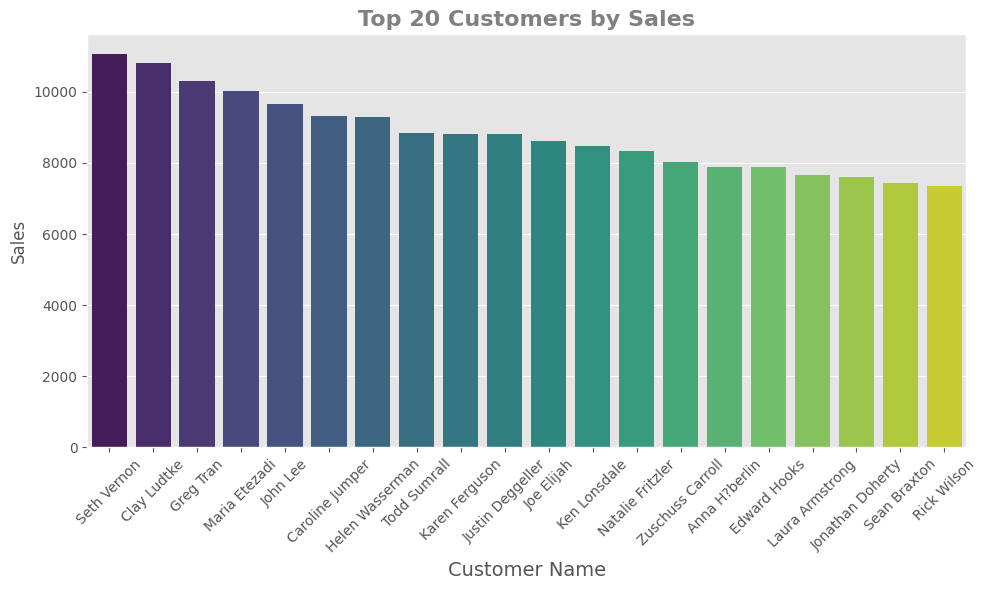

In [228]:
plt.figure(figsize=(10, 6))
sns.barplot(x=df.groupby('Customer Name')['Sales'].sum().sort_values(ascending=False).head(20).index,
            y=df.groupby('Customer Name')['Sales'].sum().sort_values(ascending=False).head(20).values,
            palette='viridis')
plt.title('Top 20 Customers by Sales', fontsize=16, fontweight='bold', color='grey')
plt.xlabel('Customer Name', fontsize=14)
plt.ylabel('Sales')
plt.xticks(rotation=45)
plt.tight_layout()
plt



***The chart shows the top 20 customers by total sales. It seems that Seth Vernon is leading once again, and apparently, he is making purchases not only in New York.***

# 8. Plot the Cumulative curve in Sales by Customers. Can we apply Pareto principle to customers and Sales ?

In [314]:
df_sorted = df.groupby('Customer Name')['Profit'].sum().sort_values(ascending=False)

In [318]:
cumulative_profit = df_sorted.cumsum()

In [319]:
total_profit = df_sorted.sum()
cumulative_percentage = cumulative_profit / total_profit * 100

In [320]:
x_values = np.linspace(0, 100, len(df_sorted))

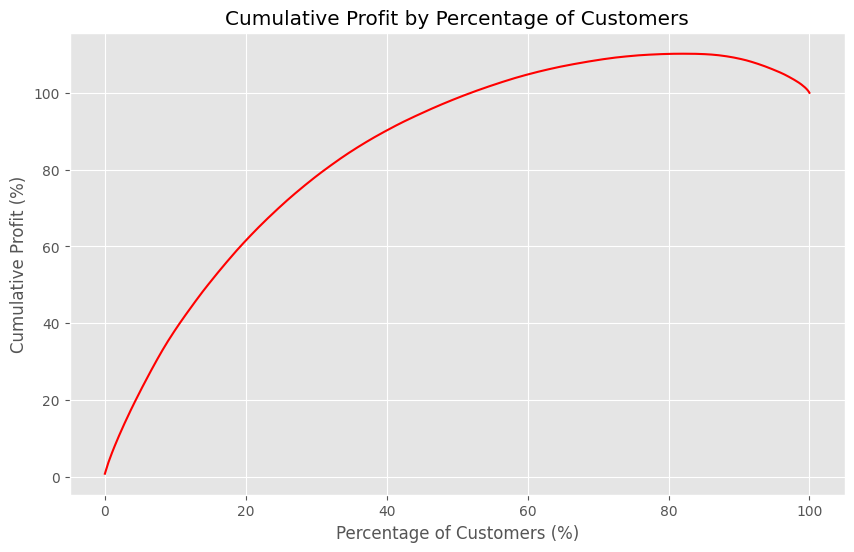

In [322]:
plt.figure(figsize=(10, 6))
plt.plot(x_values, cumulative_percentage, marker='', linestyle='-', color='red')
plt.xlabel('Percentage of Customers (%)')
plt.ylabel('Cumulative Profit (%)')
plt.title('Cumulative Profit by Percentage of Customers')
plt.grid(True)
plt.show()

On this chart, we can clearly see the confirmation of the Pareto principle. About 30% of customers generate approximately 80% of the cumulative profit.
This principle of plotting is more visual than a pie chart

# 9. Based on the analysis, make decisions on which states and cities to prioritize for marketing strategies.

In [328]:
states_sales_sorted = df.groupby('State')['Sales'].sum().sort_values(ascending=False)
cumulative_sales = states_sales_sorted.cumsum()

In [329]:
total_sales = states_sales_sorted.sum()
cumulative_percentage_sales = cumulative_sales / total_sales * 100

In [330]:
fig = go.Figure()
fig.add_trace(go.Scatter(x=cumulative_percentage_sales.index, y=cumulative_percentage_sales.values, mode='lines+markers', line=dict(color='pink')))
fig.update_layout(title='Cumulative Sales by State',
                  xaxis_title='State',
                  yaxis_title='Cumulative Sales (%)')
fig.show()

Based on the analysis of the cumulative curve and bar charts for sales and profit, the following conclusions can be made about which states and cities to prioritize for marketing strategies:


**Priority states and cities:** Marketing efforts should focus on the states and cities that fall in the upper part of the cumulative curve and account for about 80% of the profit. These regions show a significant contribution to total sales and are the most promising for further growth.


**Strategy optimization for low-performing regions**: States and cities at the end of the cumulative curve have relatively low profit. A deeper analysis should be conducted for these regions to understand the reasons for low performance and possibly revise the business strategies to improve their effectiveness.